In [48]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# 꽃잎/꽃받침 길이와 너비 데이터프레임 형성

iris_pd = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# 품종 추가

iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


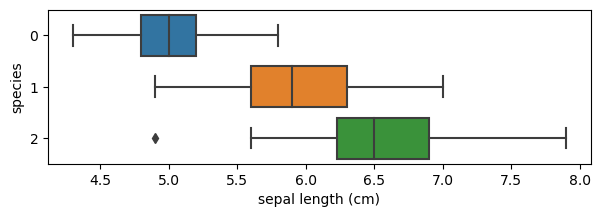

In [24]:
plt.figure(figsize=(7,2))
sns.boxplot(
    x='sepal length (cm)', 
    y='species',
    data=iris_pd,
    orient='h');

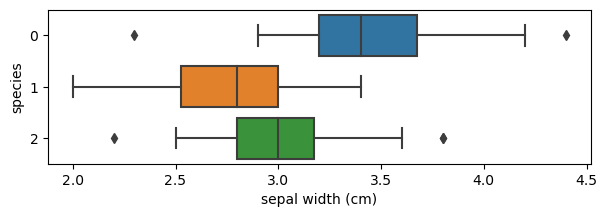

In [25]:
plt.figure(figsize=(7,2))
sns.boxplot(
    x='sepal width (cm)', 
    y='species',
    data=iris_pd,
    orient='h');

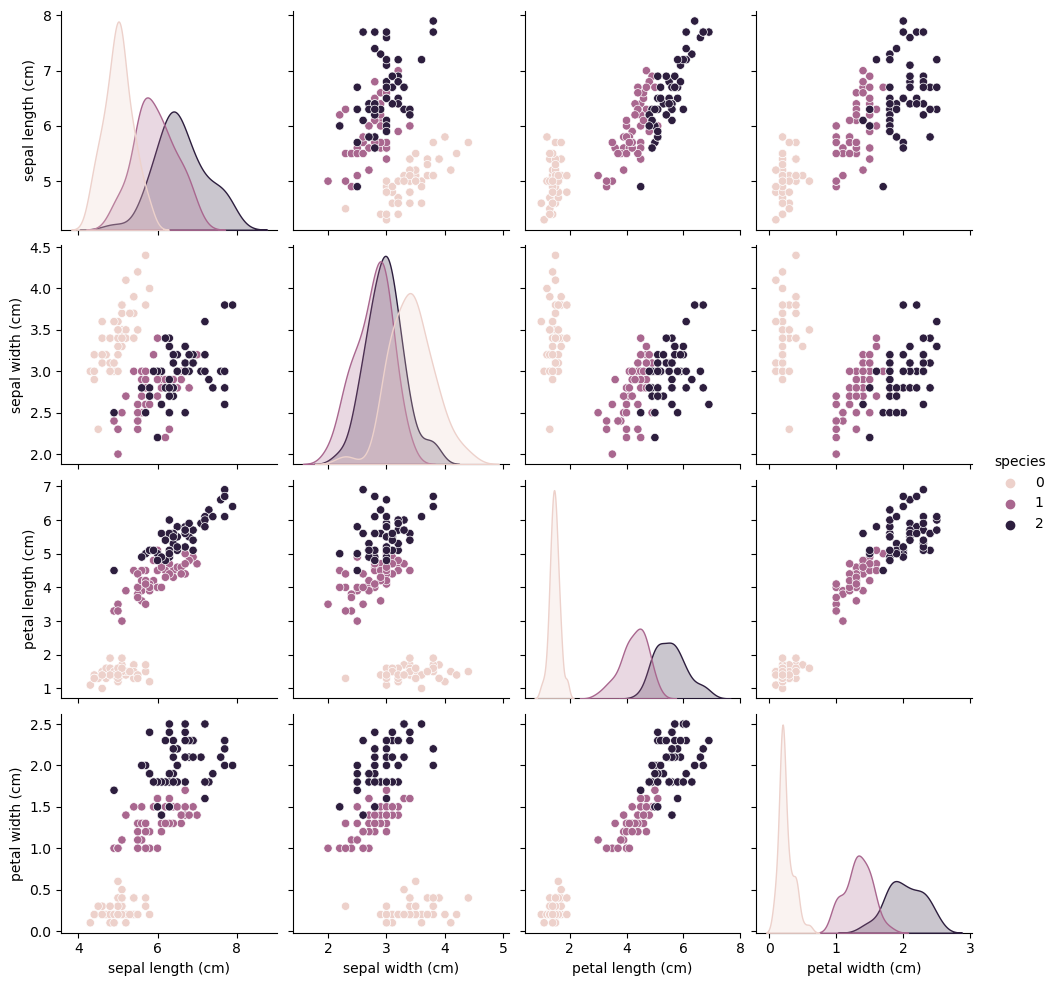

In [29]:
sns.pairplot(iris_pd, hue = 'species');

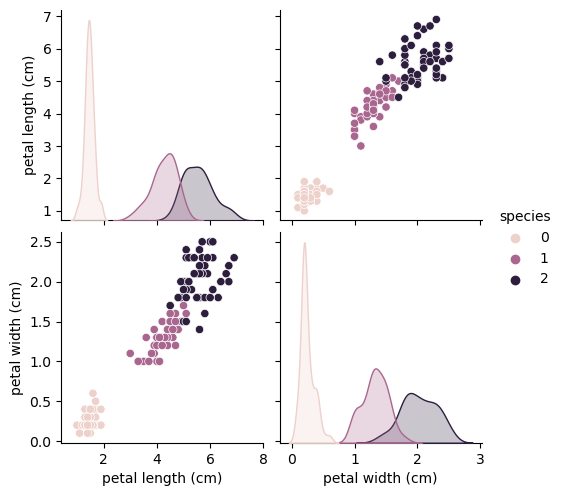

In [30]:
sns.pairplot(
    iris_pd,
    vars=['petal length (cm)', 'petal width (cm)'], 
    hue = 'species');

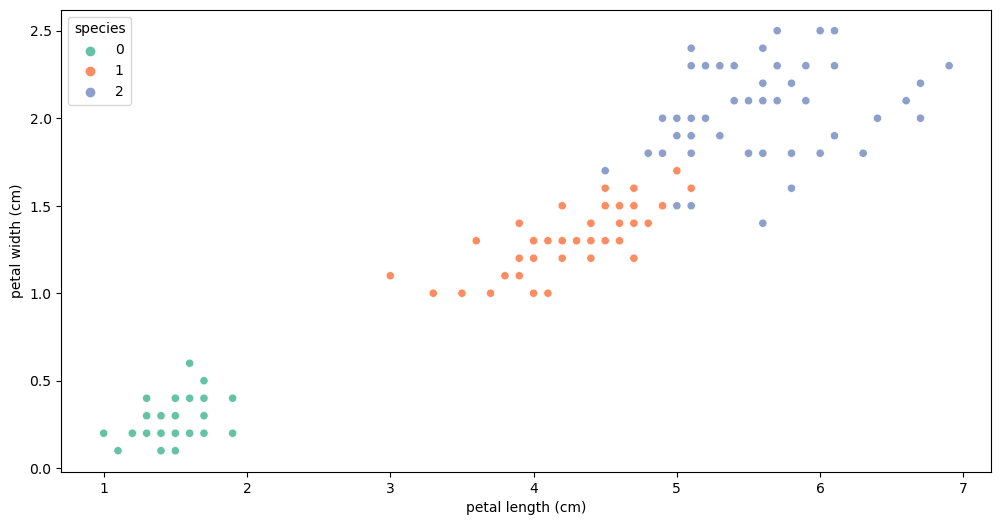

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    data=iris_pd,
    hue='species',
    palette='Set2');

In [32]:
# versicolor와 virginica만 갖는 데이터프레임 생성

iris_12 = iris_pd[iris_pd['species']!=0]
iris_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   species            100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


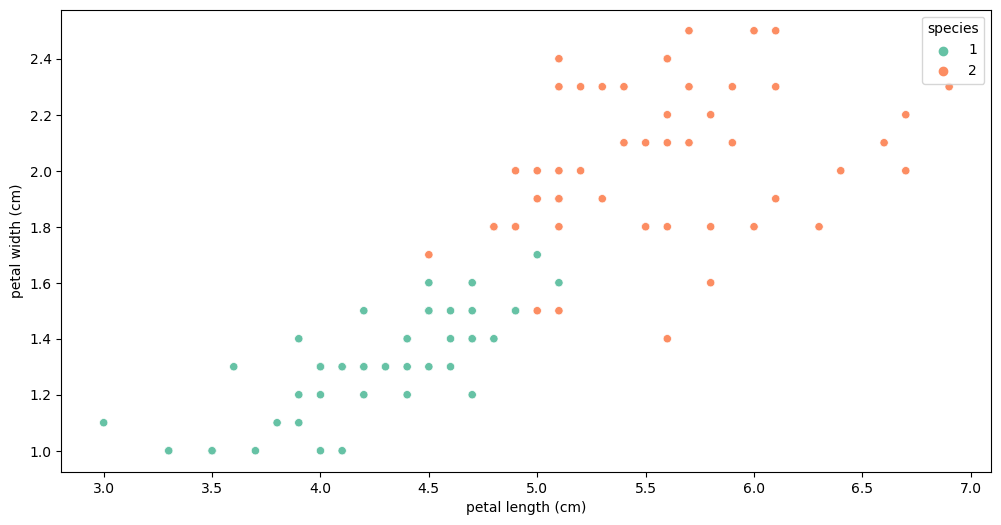

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    data=iris_12,
    hue='species',
    palette='Set2');

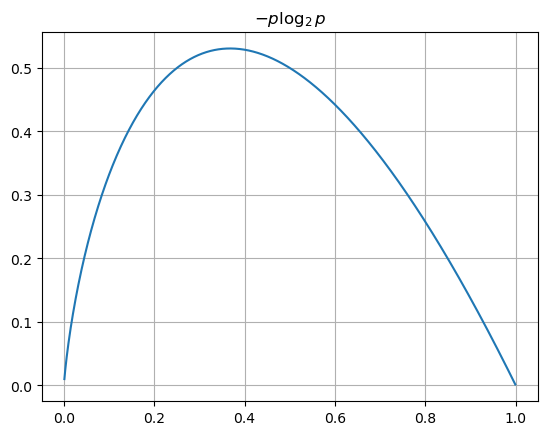

In [39]:
p = np.arange(0.001, 1, 0.001)
plt.grid()
plt.title('$-p \log_{2}{p}$')
plt.plot(p, -p*np.log2(p));

In [41]:
# decision tree 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_tree = DecisionTreeClassifier()

In [45]:
# sepal length와 width는 전체 분류에 유효하지 않으므로
# petal length와 width만 사용하도록 함

iris.data[:, 2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [47]:
# clf.fit() >> 정보와 결과 데이터 제공으로 규칙 생성

iris_tree.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier()

In [49]:
# 생성한 classifier 의 성능 확인
# 1. 먼저 생성한 classifier 와 기존 데이터 (iris.data) 를 제공하여 새로운 답 (y_pred_tr) 생성

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
y_pred_tr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# 2. accuray_score를 통해 기존 답 (iris.target) 과 새로운 답 (y_pred_tr) 의 비교

accuracy_score(iris.target, y_pred_tr)

0.9933333333333333

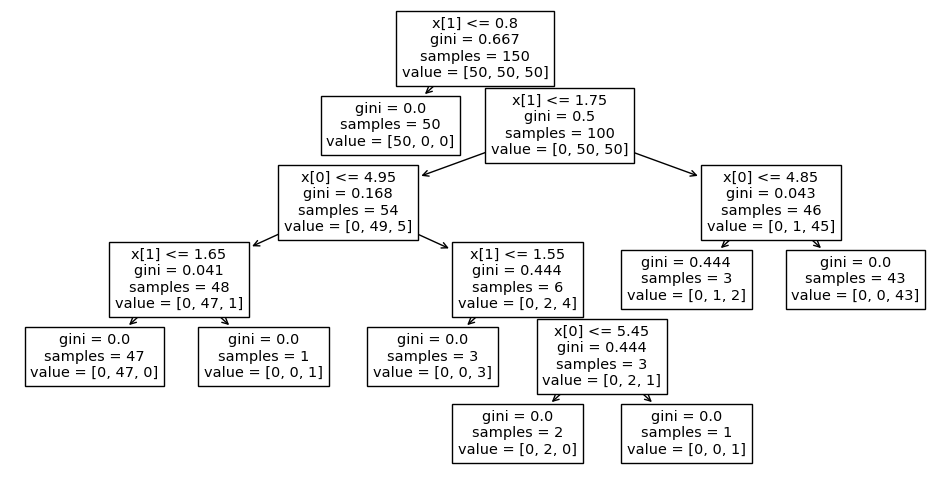

In [52]:
# 생성한 iris clf 의 decision tree 확인

from sklearn.tree import plot_tree

plt.figure(figsize=(12,6))
plot_tree(iris_tree);

In [53]:
# !pip install mlxtend

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 1.4/1.4 MB 28.6 MB/s eta 0:00:00


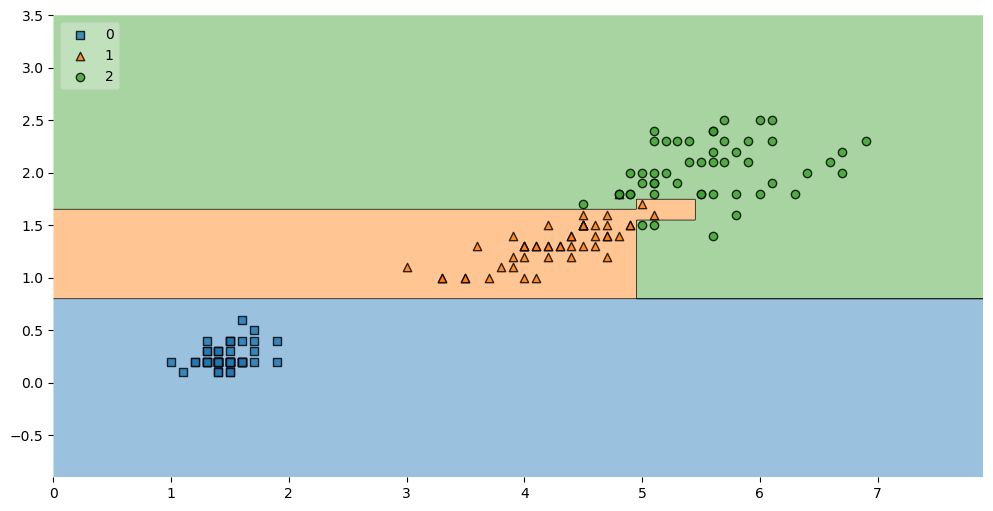

In [58]:
# decision tree에 의한 분류 구획을 visualization 하는 방법

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,6))
plot_decision_regions(
    X=iris.data[:, 2:],     # X 는 대문자로 해야 됨, 소문자 넣으면 오류
    y=iris.target, 
    clf=iris_tree, 
    legend=2);

In [63]:
# 과적합을 피하기 위한 데이터 나누기
# 훈련용: 80% 의 데이터  /  검증용: 20% 의 데이터 >> test_size

from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]  # 학습할 데이터
labels = iris.target  # 학습 데이터의 정답

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = 0.2,
                                                    stratify=labels, # 검증용 데이터 추출 할 때 정답 갯수에 맞춰 같은 비율로 추출
                                                    random_state=13) 
                                                    # random_state는 무작위 추출시 생기는 seed 이므로 다른 사람이나 수강 중 내용을 맞추고 싶을 때 사용


In [65]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [66]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [82]:
# 새로운 decision tree 생성 (데이터셋의 80%에 해당하는 train만 이용)

iris_tree2 = DecisionTreeClassifier(max_depth=2, random_state=13) # max_depth >> 몇 번째 decision branch까지 만들 것인지 제한 (너무 높으면 과적합)
iris_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

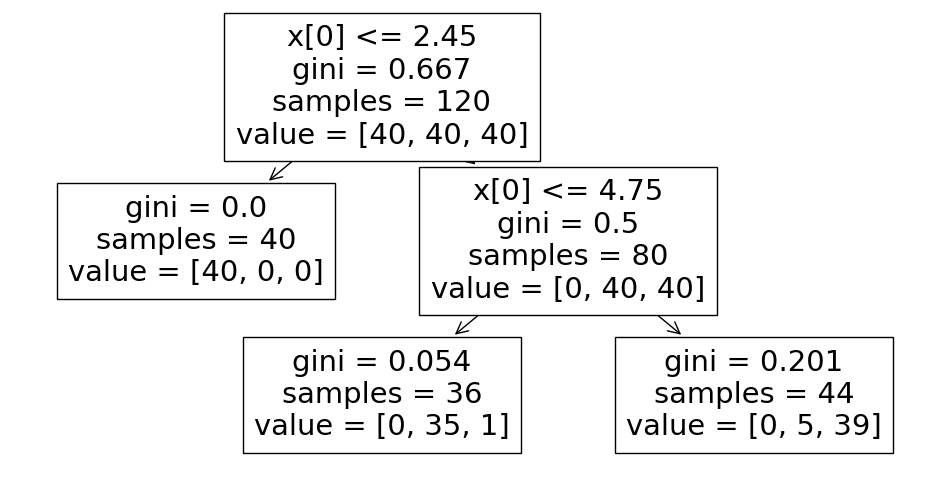

In [83]:
plt.figure(figsize=(12,6))
plot_tree(iris_tree2);

In [84]:
# 새롭게 생성한 decision tree의 정확도 확인

y_pred_tr2 = iris_tree2.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr2)

0.9533333333333334

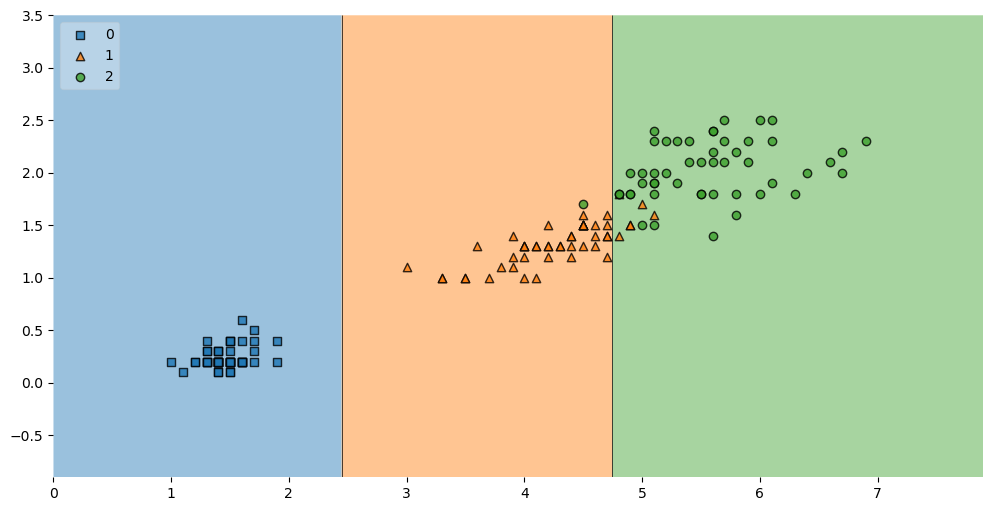

In [85]:
plt.figure(figsize=(12,6))
plot_decision_regions(
    X=iris.data[:, 2:],
    y=iris.target,
    clf=iris_tree2, 
    legend=2);

In [86]:
# 분리하였던 테스트 데이터로 정확도 확인 [전체 데이터, 테스트 데이터의 정확도가 비슷하면 과적합이 아니라고 말할 수 있음]

y_pred_test = iris_tree2.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

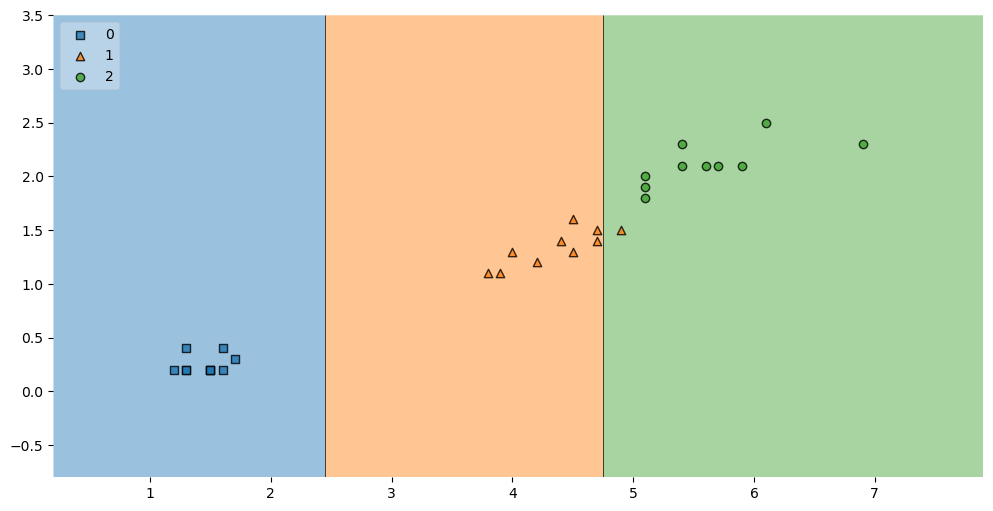

In [87]:
plt.figure(figsize=(12,6))
plot_decision_regions(
    X=X_test,
    y=y_test,
    clf=iris_tree2, 
    legend=2);

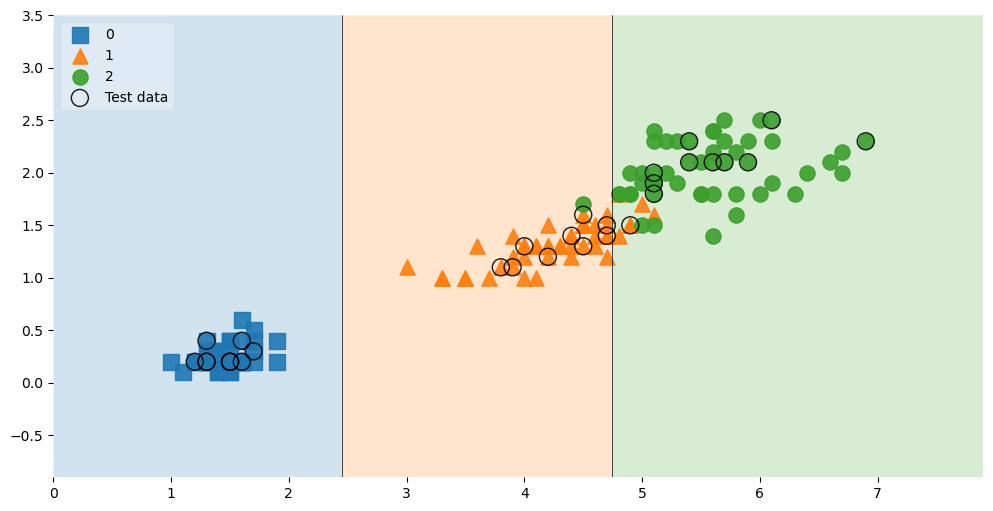

In [90]:
# 전체 데이터와 검증 데이터를 같이 그래프에 표시하여 확인

scatter_highligh_kwargs={'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs={'s':120, 'edgecolor':None, 'alpha':0.9}

plt.figure(figsize=(12,6))
plot_decision_regions(
    X=features,
    y=labels,
    X_highlight=X_test,
    clf = iris_tree2,
    legend=2,
    scatter_highlight_kwargs=scatter_highligh_kwargs,
    scatter_kwargs=scatter_kwargs,
    contourf_kwargs={'alpha':0.2}
    );

In [92]:
# 전체 특성을 이용하는 경우 (꽃받침, 꽃잎의 길이와 너비 >> 총 4개의 특성)

features2 = iris.data
labels2 = iris.target

X_train, X_test, y_train, y_test = train_test_split(features2, labels2,
                                                    test_size=0.2,
                                                    stratify=labels2,
                                                    random_state=13)

iris_tree3 = DecisionTreeClassifier(max_depth=2, random_state=13)

iris_tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

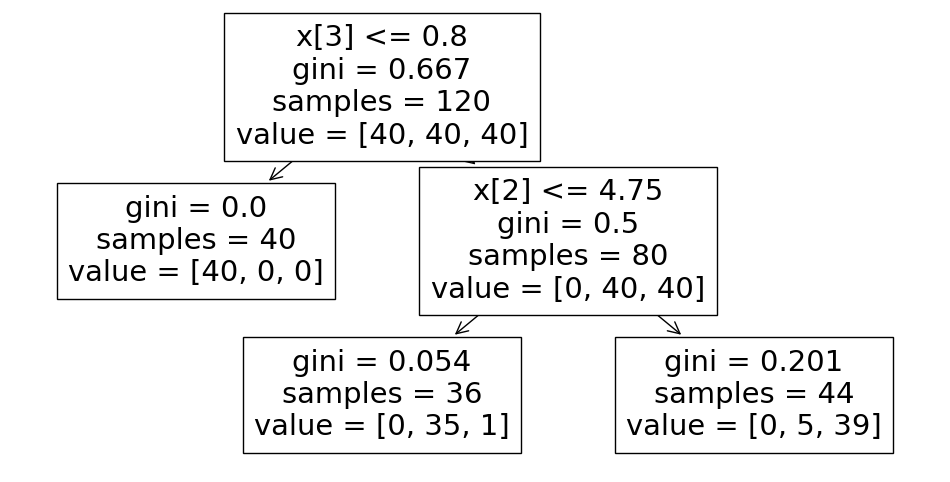

In [94]:
plt.figure(figsize=(12,6))
plot_tree(iris_tree3);

In [93]:
# 길 가다 주운 iris 꽃의 꽃받침/꽃잎 길이를 모델에 적용

test_data = np.array([[4.3, 2., 1.2, 1.]])
iris_tree3.predict(test_data)

array([1])

In [97]:
# 각 종류일 확률 제시

iris_tree3.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [98]:
# 모델에 적용하였을 때 답을 숫자가 아닌 데이터셋 내 문자열로 표기

iris.target_names[iris_tree3.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [100]:
# 각 특성의 데이터 중요도 확인  >>  지정한 max_depth, 제공한 dataset 에 한정

iris_tree3.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [101]:
dict(zip(iris.feature_names, iris_tree3.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}

In [118]:
# zip

list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

zip(list1, list2)

In [116]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [117]:
# 튜플을 dict로 변경

dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [115]:
# 처음부터 dict까지 한번에

dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [120]:
# 이전에 pairing 된 리스트들 unpacking
# 그냥 unpacking하면 튜플 형태

a, b = zip(*pairs)

print(a)
print(b)
print(list(a))
print(list(b))

('a', 'b', 'c')
(1, 2, 3)
['a', 'b', 'c']
[1, 2, 3]
